In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import lightgbm as lgb
import warnings

In [ ]:
pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 32.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=520bd9e94ace5380afab9784efc2633cd6ca722c975586d7e53c5525e490bb89
  Stored in directory: /root/.cache/pip/wheels/4f/ca/96/4cc5e192421cceb077fbf4ffec533382edd416fd3fa0af0bbd
Successfully built japanize-matplotlib


In [ ]:
import japanize_matplotlib

In [ ]:
df = pd.read_csv("mid.csv",encoding ='UTF-8')

In [ ]:
df = df.drop(["種類","都道府県名"], axis=1)

In [ ]:
df = df.drop(["今後の利用目的", "取引の事情等"], axis=1)

In [ ]:
def data_preprocess(df):
  cat_fetures = ["市区町村名", "地区名", "最寄駅：名称", "間取り", "建物の構造", "用途", "都市計画", "改装"]
  for col in cat_fetures:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(df[col])
    lbl.transform(df[col])
    df[col] = lbl.transform(df[col])
  return df

df =data_preprocess(df)

In [ ]:
df.isnull().sum()

市区町村名           0
地区名             0
最寄駅：名称          0
最寄駅：距離（分）    1731
取引価格（総額）        0
間取り             0
面積（㎡）           0
建物の構造           0
用途              0
都市計画            0
建ぺい率（％）      1171
容積率（％）       1171
取引時点            0
改装              0
築年数           889
dtype: int64

In [ ]:
X = df.drop(["取引価格（総額）"], axis=1)
y = df["取引価格（総額）"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
model = lgb.LGBMRegressor(
    boosting_type='gbdt',
    objective='regression',
    n_estimators=1000,
    )
    
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
print("平均二乗誤差 (MSE): ", mean_squared_error(y_test, y_pred)) 
print("二乗平均平方根誤差(RMSE): ", mean_squared_error(y_test, y_pred, squared=False)) 
print("平均絶対誤差 (MAE): ", mean_absolute_error(y_test, y_pred)) 
print("決定係数(R2): ", r2_score(y_test, y_pred)) 
print("平均絶対誤差率(MAPE): ", np.mean(np.abs((y_pred - y_test) / y_test)) * 100) 

平均二乗誤差 (MSE):  11285666120287.799
二乗平均平方根誤差(RMSE):  3359414.5502286255
平均絶対誤差 (MAE):  2319922.6782098874
決定係数(R2):  0.8775596649344537
平均絶対誤差率(MAPE):  129.0757449830768


In [ ]:
print("学習データに対する決定係数(R2): ", model.score(X_train ,y_train)) 
print("テストデータに対する決定係数(R2): ", model.score(X_test, y_test)) 

学習データに対する決定係数(R2):  0.9227912206040824
テストデータに対する決定係数(R2):  0.8775596649344537


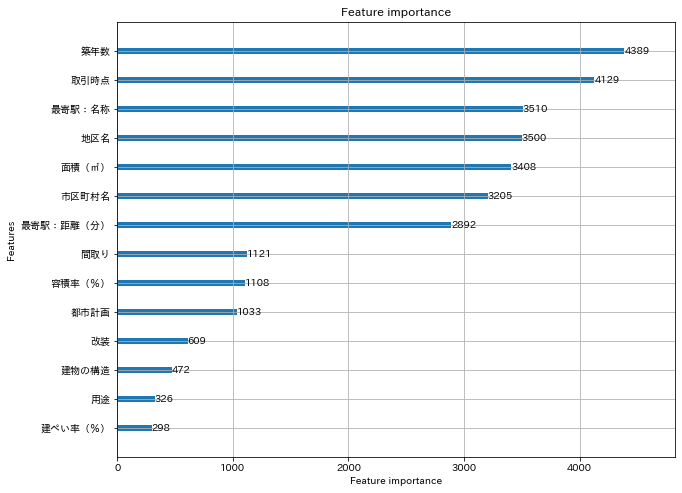

In [ ]:
lgb.plot_importance(model, importance_type='split', figsize=(10,8))
plt.show()

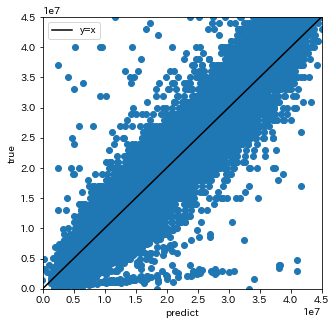

In [ ]:
plt.figure(figsize=(5, 5)) 
plt.plot([0,y_test.max()], [0,y_test.max()], label="y=x", color="black")
plt.scatter(y_pred, y_test)
plt.legend()
plt.xlim(0, y_test.max())
plt.ylim(0, y_test.max())
plt.xlabel("predict")
plt.ylabel("true")
plt.show()

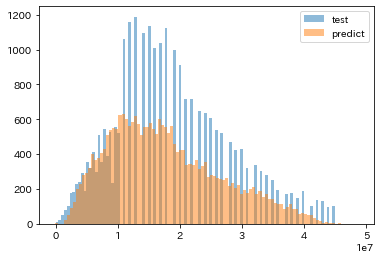

In [ ]:
plt.hist(y_test, bins=100, alpha=0.5, label="test")
plt.hist(y_pred, bins=100, alpha=0.5, label="predict")
plt.legend()
plt.show()